<a href="https://colab.research.google.com/github/AryanXTH/AI-and-ML/blob/main/AI_and_ML_Worshop1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2 Getting Started with Image Processing with Python.
Introduction to Python Imaging Library(PIL)
2.1 Exercise - 1:
Complete all the Task.
1. Read and display the image.
• Read the image using the Pillow library and display it.
• You can also use matplotlib to display the image.
2. Display only the top left corner of 100x100 pixels.
• Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and
Array Indexing.
3. Show the three color channels (R, G, B).
• Separate the image into its three color channels (Red, Green, and Blue) and display them
individually, labeling each channel as R, G, and B.{Using NumPy.}
4. Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:
• Modify the pixel values of the top-left 100 × 100 region to have a value of 210 (which is a
light gray color), and then display the modified image.


In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

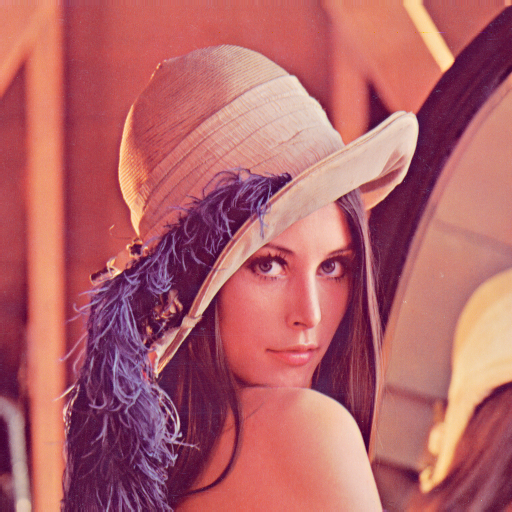

In [ ]:

image_colored = Image.open ("/content/Lenna_(test_image).png")
display ( image_colored )

In [ ]:
print (" Image Format: ", image_colored.format)
print ("Image size:", image_colored.size);

 Image Format:  PNG
Image size: (512, 512)


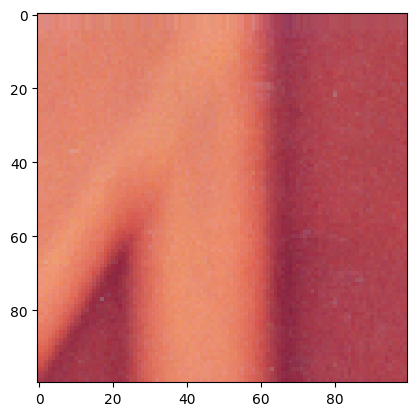

In [ ]:
# Converting image into array using .np
image_array = np.array(image_colored)

# Extracting top-left 100x100 pixels of the image
top_left_corner = image_array[:100, :100]

# Display the extracted portion
plt.imshow(top_left_corner)
plt.show()

In [ ]:
# Displaying height , shape and channels
print("Shape of image in array:", image_array.shape)

Shape of image in array: (512, 512, 3)


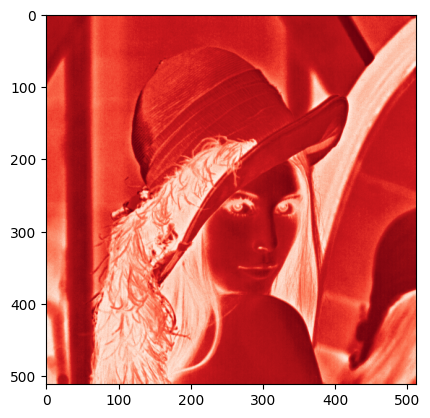

In [ ]:
red_channel = image_array[:, :, 0]
plt.imshow(red_channel, cmap="Reds")
plt.show()

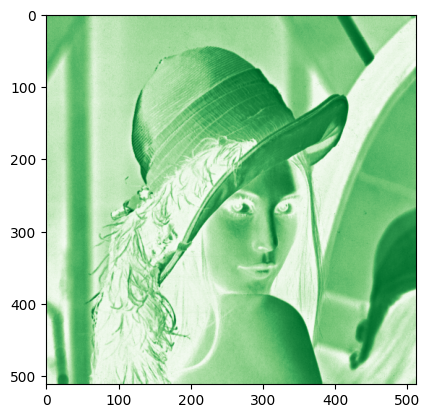

In [ ]:
green_channel = image_array[:,:,1]
plt.imshow(green_channel, cmap="Greens")
plt.show()

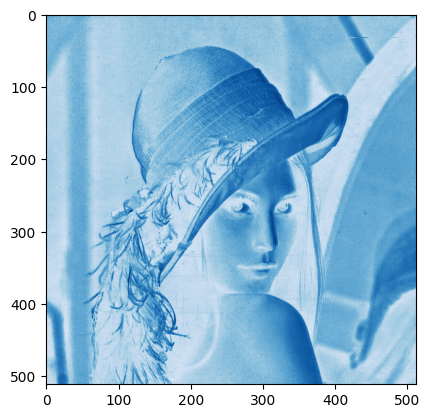

In [ ]:
blue_channel = image_array[:, :, 2]
plt.imshow(blue_channel, cmap="Blues")
plt.show()


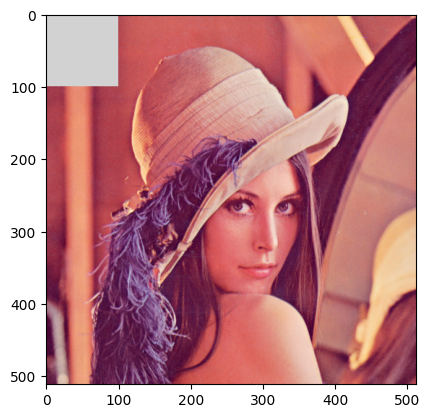

In [ ]:
# using =210 for grey
image_array [:100,:100,:] = 210
plt.imshow(image_array)
plt.show()

 2.2 Exercise- 2:
 Complete all the Task.
 1. Load and display a grayscale image.
 • Load a grayscale image using the Pillow library.
 • Display the grayscale image using matplotlib.
 2. Extract and display the middle section of the image (150 pixels).
 • Extract a 150 pixel section from the center of the image using NumPy array slicing.
 • Display this cropped image using matplotlib.
 3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).
 • Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values
 above 100 to 255 (creating a binary image).
 • Display the resulting binary image.
 4. Rotate the image 90 degrees clockwise and display the result.
 • Rotatethe image by90degrees clockwise using the Pillow rotate method or by manipulating
 the image array.
 • Display the rotated image using matplotlib.
 5. Convert the grayscale image to an RGB image.
 • Convert the grayscale image into an RGB image where the grayscale values are replicated
 across all three channels (R, G, and B).
 • Display the converted RGB image using matplotlib.

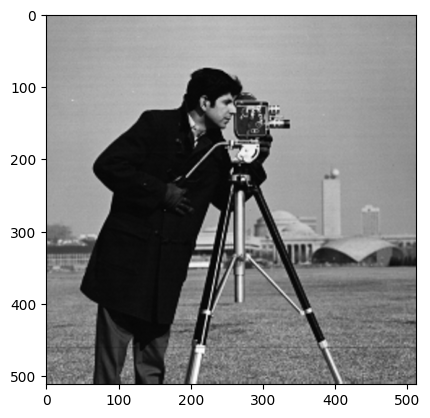

In [6]:
grayImg = Image.open("/content/cameraman.png");
plt.imshow(grayImg, cmap="gray")
plt.show()

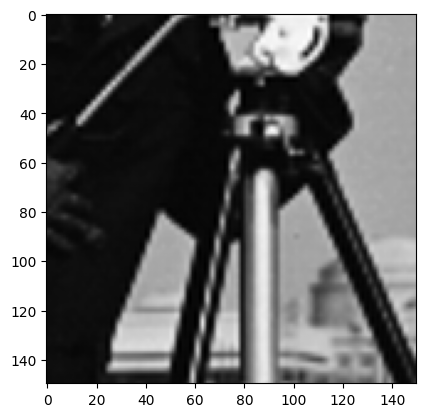

In [21]:
gray_array = np.array(grayImg);
width,height = gray_array.shape
cropped = gray_array[(height - 150)//2 : (height + 150)//2, (width - 150)//2 : (width + 150)//2]
plt.imshow(cropped, cmap="gray")
plt.show()

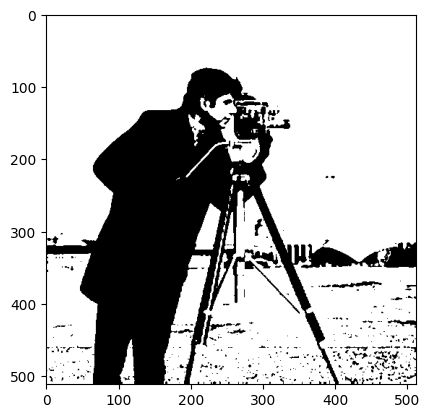

In [24]:
thres = np.where(gray_array < 100,0,225);
plt.imshow(thres, cmap="gray")
plt.show()

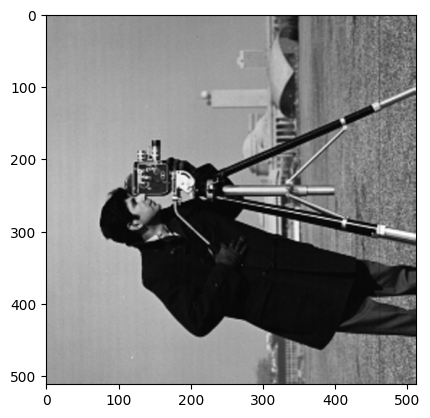

In [32]:
rotate = np.rot90 (grey_array)
plt.imshow(rotate, cmap="gray")
plt.show()

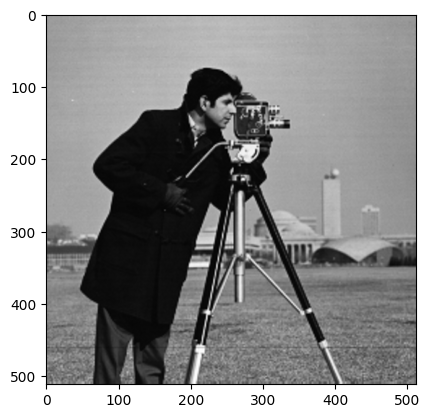

In [39]:
rgb = np.stack([gray_array]*3, axis=-1)
plt.imshow(rgb)
plt.show()

3 Image Compression and Decompression using PCA.
 In this exercise, build a PCA from scratch using explained variance method for image compression task.
 You are expected to compute the necessary matrices from the scratch. Dataset: Use image of your
 choice.
 1. Load and Prepare Data:
 • Fetch an image of you choice.{If colour convert to grayscale}
 • Center the dataset- Standaridze the Data.
 • Calculate the covaraince matrix of the Standaridze data.
 2. Eigen Decomposition and Identifying Principal Components:
 • Compute Eigen Values and Eigen Vectors.
 • Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to
 the highest eigenvalues.
 • Identify the Principal Components with the help of cumulative Sum plot.
 3. Reconstruction and Experiment:
 • Reconstruction: Transform the original data by multiplying it with the selected eigenvec
tors(PCs) to obtain a lower-dimensional representation.
 • Experiments: Pick Four different combination of principal components with various ex
plained variance value and compare the result.
 • Display the Results and Evaluate.

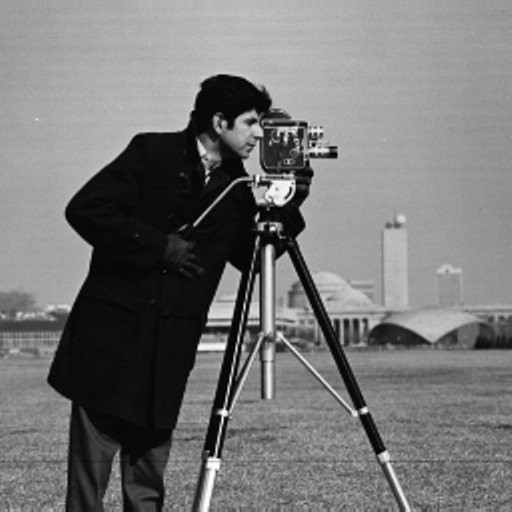

In [41]:
PCA_image = Image.open("/content/cameraman.png")
display(PCA_image)

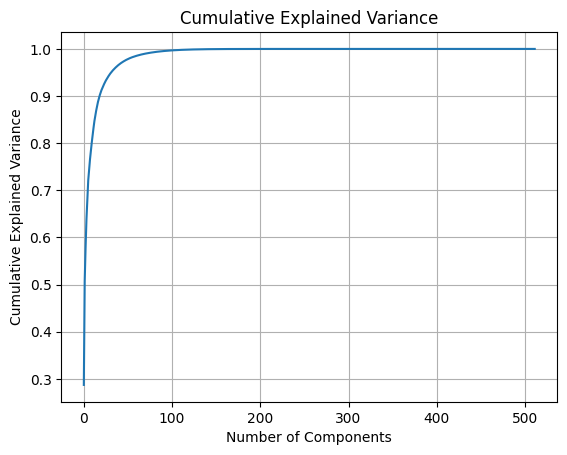

In [54]:
PCA_array = np.array (PCA_image)
width,height = PCA_array.shape
data = PCA_array.reshape(width,height)

# StandardizetheData
mean = np.mean(data, axis=0)
centered_data = data - mean

# Compute Covariance Matrix

covMat = np.cov(centered_data)

# ComputeEigenvalues&Eigenvectors:
eigenvalues, eigenvectors = np.linalg.eigh(covMat)

# sorting in decending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Picking the Principal Components

# Ploting the explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
plt.plot(np.cumsum(explained_variance_ratio))
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

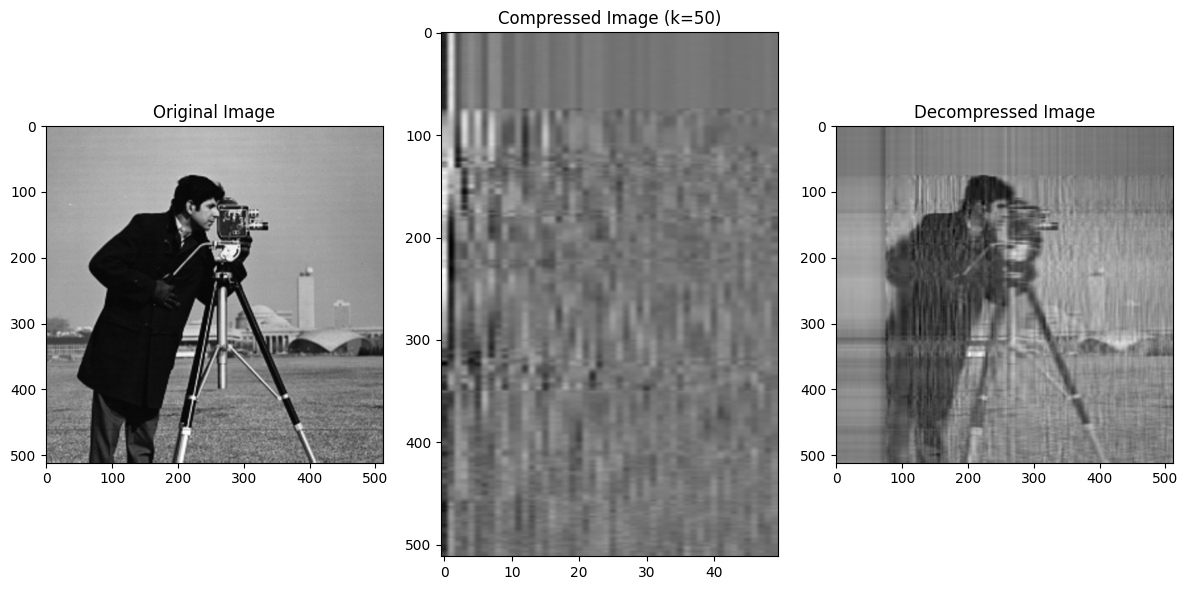

In [56]:
# Select Top k Principal Component

k = 50
components = eigenvectors[:, :k]

# compress the image
compressed_data = np.dot(centered_data, components)

# Reconstruct(Decompress)theImage
decompressed_data = np.dot(compressed_data, components.T) + mean

# FinalVisualization
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(PCA_array, cmap="gray")
plt.title("Original Image")


# Compressed Representation
plt.subplot(1, 3, 2)
plt.imshow(compressed_data, cmap="gray", aspect="auto")
plt.title(f"Compressed Image (k={k})")


# Decompressed Image
plt.subplot(1, 3, 3)
plt.imshow(decompressed_data, cmap="gray")
plt.title("Decompressed Image")
plt.tight_layout()
plt.show()
